# **MATH 359: Project Assignment 2024/2025**
## **Modular Exponentiation, Brute-Force Password Cracking and RSA Complexity Analysis**

### **Group Members:**

``` bash
1.⁠ ⁠⁠Abormegah Elisah Yaw - 10823700
2. Angela Acquah - 11033579  
3. Ebenezer Ofori Acquah - 11154989  
4. Reuben Addo - 11019527  
5.⁠ ⁠Anti Bright Gyeadu - 11340436
6. Cyril Ashong - 11253767  
7.⁠ ⁠⁠Javis Frimpong - 11285447
8. Mensah Lartey Isaiah Nii Larte - 11222100  
9.⁠ ⁠Raphael Quaye - 11253474             
10. Tattah Abel Mawunyo - 11335775  
```


 

---

## **Introduction**
This project explores the computational complexity of **RSA decryption** and **brute-force password cracking** through a series of experiments. The objectives of this project include:  

1. **Modular Exponentiation**  
   - Implementing the modular exponentiation algorithm in Python.  
   - Comparing its efficiency with direct exponentiation and Python's built-in `%` operator.  

2. **RSA Brute-Force Attack Analysis**  
   - Finding the decryption key `d` for RSA without knowing the prime factors.  
   - Measuring the time required for different key sizes (4-digit, 6-digit, 8-digit, 10-digit primes).  
   - Visualizing the time complexity of the brute-force attack.  

3. **Password Cracking via Brute-Force**  
   - Cracking **4-digit numeric** and **6-digit numeric** PIN codes.  
   - Cracking **4-character and 6-character alphanumeric** passwords (case-sensitive).  
   - Collecting execution time data and plotting the results.  

Through this project, we aim to highlight the growing difficulty of breaking encryption and passwords as complexity increases. The results are visualized using plots to better understand how security scales with key size and password length.  


_This presentation does not demonstrate the live execution of the RSA brute-force attack but instead focuses on the analysis and discussion of the results. The full implementation, including the source code and execution details, is available on [GitHub](https://github.com/Programming-Sai/CryptAnalysis.git). This work highlights how execution time scales with key size, reinforcing the impracticality of brute-force attacks on large RSA keys._

In [1]:
# Performing all imports

import pandas as pd
import time
import os
import math
import random
import string
import matplotlib.pyplot as plt
from IPython.display import display, HTML



In [2]:
# helper function
def read_output_txt_file(filename):
    with open(filename, 'r') as f:
        print(f.read())

## **Experimenting with Different Approaches for Modular Exponentiation**  

Modular arithmetic is a fundamental concept in number theory and cryptography. One key operation in modular arithmetic is **modular exponentiation**, which calculates:  

$$
\text{base}^{\text{exp}} \mod n
$$  

This operation is widely used in cryptographic algorithms like **RSA** to efficiently handle large exponentiations under a modulus. In this analysis, we explore different computational methods and compare their efficiency.  

---

### **2. Approaches to Modular Exponentiation**  
We evaluate three approaches to computing modular exponentiation:  

1. **Direct Computation** – Compute $ \text{base}^{\text{exp}} $ first, then take modulo $ n $.  
2. **Exponentiation by Squaring** – Uses a divide-and-conquer approach to optimize computations.  
3. **Python’s Built-in `pow()` Function** – A highly optimized internal implementation.  

These methods will be implemented and benchmarked for performance.  

---

### **3. Testing and Validation**  
To verify the correctness and efficiency of each approach, we will use the following test cases:  

- **Test Case 1:** $ 3^{644} \mod 645 $  
- **Test Case 2:** $ 7^{121} \mod 13 $  

All methods should produce the same results while differing in computational efficiency.

In [3]:
# Codes for each approach


# Direct Approach
direct_approach = lambda base, exponent, modulus: (base ** exponent) % modulus


# Exponentiation by Squaring approach
def exponentiation_by_squaring_approach(base, exponent, modulus):
    result = 1
    base = base % modulus  # Handle base greater than modulus

    while exponent > 0:
        # If exponent is odd, multiply the current base with result
        if exponent % 2 == 1:
            result = (result * base) % modulus

        # Now exponent must be even, square the base and halve the exponent
        exponent = exponent // 2
        base = (base * base) % modulus

    return result



# Python's Built-In `pow()` approach
python_builtin_approach = lambda base, exponent, modulus: pow(base, exponent, modulus)




In [4]:
read_output_txt_file(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), 'modular_exponentiation_output.txt'))

Direct Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000011 seconds



Direct Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000006 seconds



Exponentiation By Squaring Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000010 seconds



Exponentiation By Squaring Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000004 seconds



Python Builtin Function Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000004 seconds



Python Builtin Function Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000003 seconds


In [5]:
# Viewing results of modular exponentiation approaches

df = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), 'modular_exponentiation_log.csv'))

df

,Approach,Base,Exponent,Modulus,Result,Execution Time (seconds)
0,Direct Approach,3,644,645,36,0.000011
1,Direct Approach,7,121,13,7,0.000006
2,Exponentiation By Squaring Approach,3,644,645,36,0.000010
3,Exponentiation By Squaring Approach,7,121,13,7,0.000004
4,Python Builtin Function Approach,3,644,645,36,0.000004
5,Python Builtin Function Approach,7,121,13,7,0.000003


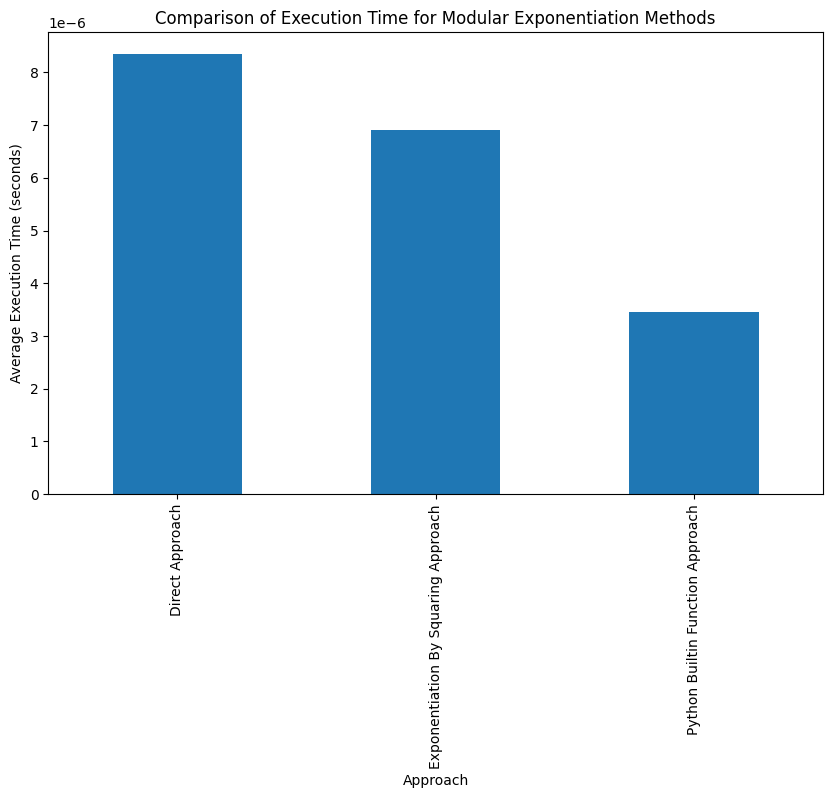

In [6]:
# Group by the method and plot the times
plt.figure(figsize=(10, 6))
df.groupby('Approach')['Execution Time (seconds)'].mean().plot(kind='bar')
plt.title('Comparison of Execution Time for Modular Exponentiation Methods')
plt.ylabel('Average Execution Time (seconds)')
plt.show()


## RSA Brute Force Timing Experiment

In this notebook, we analyze the complexity of brute-forcing the RSA private key $ d $, which is the modular inverse of $ e $ modulo $ \phi(n) $. Our objective is to examine the scalability of brute force methods as key sizes increase.

### **1. RSA Key Structure**
In RSA, the public key consists of $ \{e, n\} $, where:
- $ n = p \times q $ (product of two prime numbers $ p $ and $ q $)
- $ \phi(n) = (p-1) \times (q-1) $ (Euler’s totient function)
- $ e $ is the public exponent, typically chosen such that it is coprime with $ \phi(n) $

The private key $ d $ satisfies:
$$ d \times e \equiv 1 \pmod{\phi(n)} $$

### **2. Experiment Goals**
We attempt to find $ d $ by brute force, checking every candidate $ k $ (starting from 1) until we find:
$$ k \times e \mod \phi(n) = 1. $$

Due to the inefficiency of brute force methods, we:
- **Measure execution time for small primes** (e.g., two-digit primes)
- **Estimate execution time for larger primes** (e.g., four-digit, six-digit primes) by extrapolating iteration speeds
- **Compare results across different key sizes**

### **3. Methodology**
1. **Brute Force Implementation:**
   - We iterate through possible values of $ d $ until we find the correct inverse.
   - For small primes, we compute $ d $ directly.
   - For larger primes, we estimate execution time by measuring loop iteration speed.

2. **Automated Testing & Data Logging:**
   - We generate prime numbers of different sizes.
   - We compute $ d $ using brute force and record execution times.
   - The results are stored in a CSV file for analysis.

3. **Visualization & Analysis:**
   - We plot execution time vs. prime size.
   - We analyze the scalability of brute force search as key sizes increase.

### **4. Expected Outcome**
As the prime numbers grow, brute force computation of $ d $ becomes infeasible due to exponential time complexity. This highlights the necessity of efficient modular inverse algorithms, such as the Extended Euclidean Algorithm, for real-world RSA applications.



In [7]:
# Code for brute force rsa decryption


def extended_gcd(a, b):
    """Return tuple (g, x, y) such that ax + by = g = gcd(a, b)."""
    if a == 0:
        return (b, 0, 1)
    else:
        g, x, y = extended_gcd(b % a, a)
        return (g, y - (b // a) * x, x)
    
    

def modinv(e, phi):
    """Compute the modular inverse of e mod phi using the Extended Euclidean Algorithm."""
    g, x, _ = extended_gcd(e, phi)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % phi


def brute_force_d(p, q, e):
    """
    For given primes p and q and public exponent e,
    compute phi, then find d (the modular inverse of e modulo phi)
    by brute force. Always does the actual calculation and returns the result.
    """
    phi = (p-1) * (q-1)
    
    # First, compute d quickly using modinv (for later reference)
    d_true = modinv(e, phi)

    # Perform the brute force search, regardless of d_true size
    start = time.time()
    candidate = 1
    while candidate < d_true+1:
        if (candidate * e) % phi == 1:
            d = candidate
            break
        candidate += 1
    elapsed = time.time() - start
    return d, elapsed


In [8]:
# Terminal Results
read_output_txt_file(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), 'rsa_output.txt'))


2-digit
p: 89, q: 17, e: 13
d: 325, Execution Time: 0.000080 seconds

4-digit
p: 2953, q: 6907, e: 13
d: 6272773, Execution Time: 2.847473 seconds

6-digit
p: 100003, q: 100019, e: 13
d: 4616307709, Execution Time: 1922.659906 seconds




In [9]:
# Viewing results of modular exponentiation approaches

df = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), 'rsa_log.csv'))

# Convert 'No of Digits' into numerical values
df['Digits'] = df['No of Digits'].map({
    '2-digit': 2,
    '4-digit': 4,
    '6-digit': 6,
})

df

,No of Digits,p,q,e,d,Execution Time (seconds),Digits
0,2-digit,89,17,13,325,0.000080,2
1,4-digit,2953,6907,13,6272773,2.847473,4
2,6-digit,100003,100019,13,4616307709,1922.659906,6


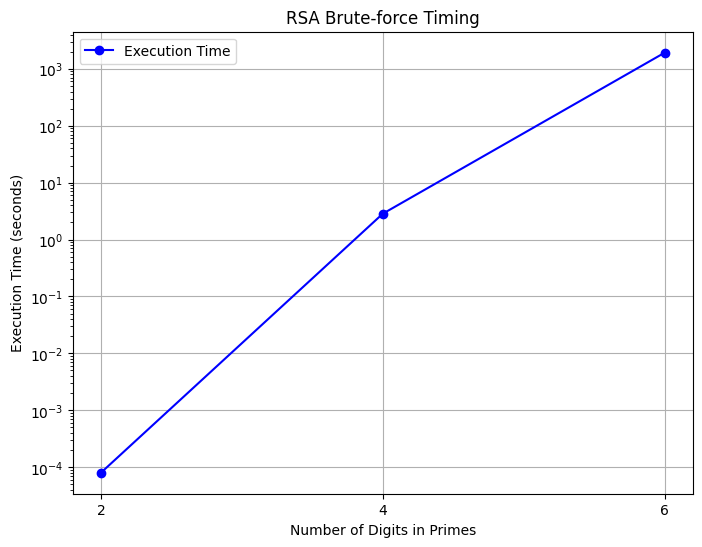

In [10]:
# Plot Execution Time vs Number of Digits
plt.figure(figsize=(8, 6))
plt.plot(df['Digits'], df['Execution Time (seconds)'], marker='o', linestyle='-', color='b', label="Execution Time")
plt.xlabel("Number of Digits in Primes")
plt.ylabel("Execution Time (seconds)")
plt.title("RSA Brute-force Timing")

# Set the y-axis to log scale
plt.yscale('log')

plt.xticks(df['Digits'])
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Brute-Force Password Cracking Project

This project demonstrates the brute-force method for cracking PIN codes and alphanumeric passwords. The brute-force approach involves systematically trying all possible character combinations until the correct password is found. We will explore three scenarios:

1. **Brute-force for a 4-digit PIN code**.
2. **Brute-force for a 6-digit PIN code**.
3. **Brute-force for alphanumeric codes** (case-sensitive), both 4 and 6 characters long.

### Methodology
For each case, we follow these steps:
- Generate a random password using the `generate_random_code` function.
- Apply the brute-force algorithm:
  - `brute_force_pin_code(code, length)`: Iterates through all numerical combinations up to the given length.
  - `brute_force_alphanumeric_code(code, length)`: Tries all case-sensitive alphanumeric combinations up to the given length.
- Measure and record the execution time for cracking each password.
- Store the results in CSV files for analysis.
- Use Matplotlib to visualize the time distribution via histograms.

### Data Collection & Visualization
- **500 iterations** are performed for each test case.
- The recorded execution times are stored in structured CSV files.
- The results are displayed in summary tables and plotted as histograms to illustrate time distribution trends.

In [11]:
# Code for Brute forcing passwords of both types


# Code for brute forcing digit only pin codes
def brute_force_pin_code(code: str, length: int):
    start_time = time.time()
    for attempt in range(10 ** length):
        guess = f'{attempt:0{length}d}'
        if guess == code:
            break
    return time.time() - start_time


# Code for brute forcing alphanumeric case sensitive pin codes.
def brute_force_alphanumeric_code(code: str, length: int):
    start_time = time.time()
    characters = string.ascii_letters + string.digits
    for attempt in range(len(characters) ** length):
        guess = ''.join([characters[(attempt // len(characters) ** i) % len(characters)] for i in range(length - 1, -1, -1)])
        if guess == code:
            break
    return time.time() - start_time


In [12]:
test_cases=[
    {'func': brute_force_pin_code, 'length': 4, 'alphanumeric': False, 'label': "Digits-Only"},
    {'func': brute_force_pin_code, 'length': 6, 'alphanumeric': False, 'label': "Digits-Only"},
    {'func': brute_force_alphanumeric_code, 'length': 4, 'alphanumeric': True, 'label': "Alphanumerc-Case-Sensitive"},
    {'func': brute_force_alphanumeric_code, 'length': 6, 'alphanumeric': True, 'label': "Alphanumerc-Case-Sensitive"},
]


In [ ]:
# This cell is not run since the output is too huge.
for case in test_cases:
    read_output_txt_file(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), f"{case['length']}_character_password_cracking_log.txt"))


In [17]:
frames = []
for case in test_cases:
    frames.append(pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')), f"{case['length']}_{case['label']}_character_password_cracking_log.csv")))

tables = [
    f'<div style="display: inline-block; padding: 10px; margin-right: 10px; vertical-align: top; width: 100%;">'
    f'<h3>{test_cases[i]["length"]}-{test_cases[i]["label"]}-Character Password</h3>'
    f'{frame.head().to_html(index=False)}</div>'
    for i, frame in enumerate(frames)
]

# Display the tables side by side with titles and spacing
display(HTML(''.join(tables)))

Length,Type,Code,Time (seconds)
4,Digits-Only,6274,0.017689
4,Digits-Only,2492,0.007071
4,Digits-Only,8885,0.011117
4,Digits-Only,9916,0.007127
4,Digits-Only,93,0.000063
Length,Type,Code,Time (seconds)
6,Digits-Only,898762,1.457033
6,Digits-Only,10750,0.017879
6,Digits-Only,365281,0.849363
6,Digits-Only,547655,0.738724


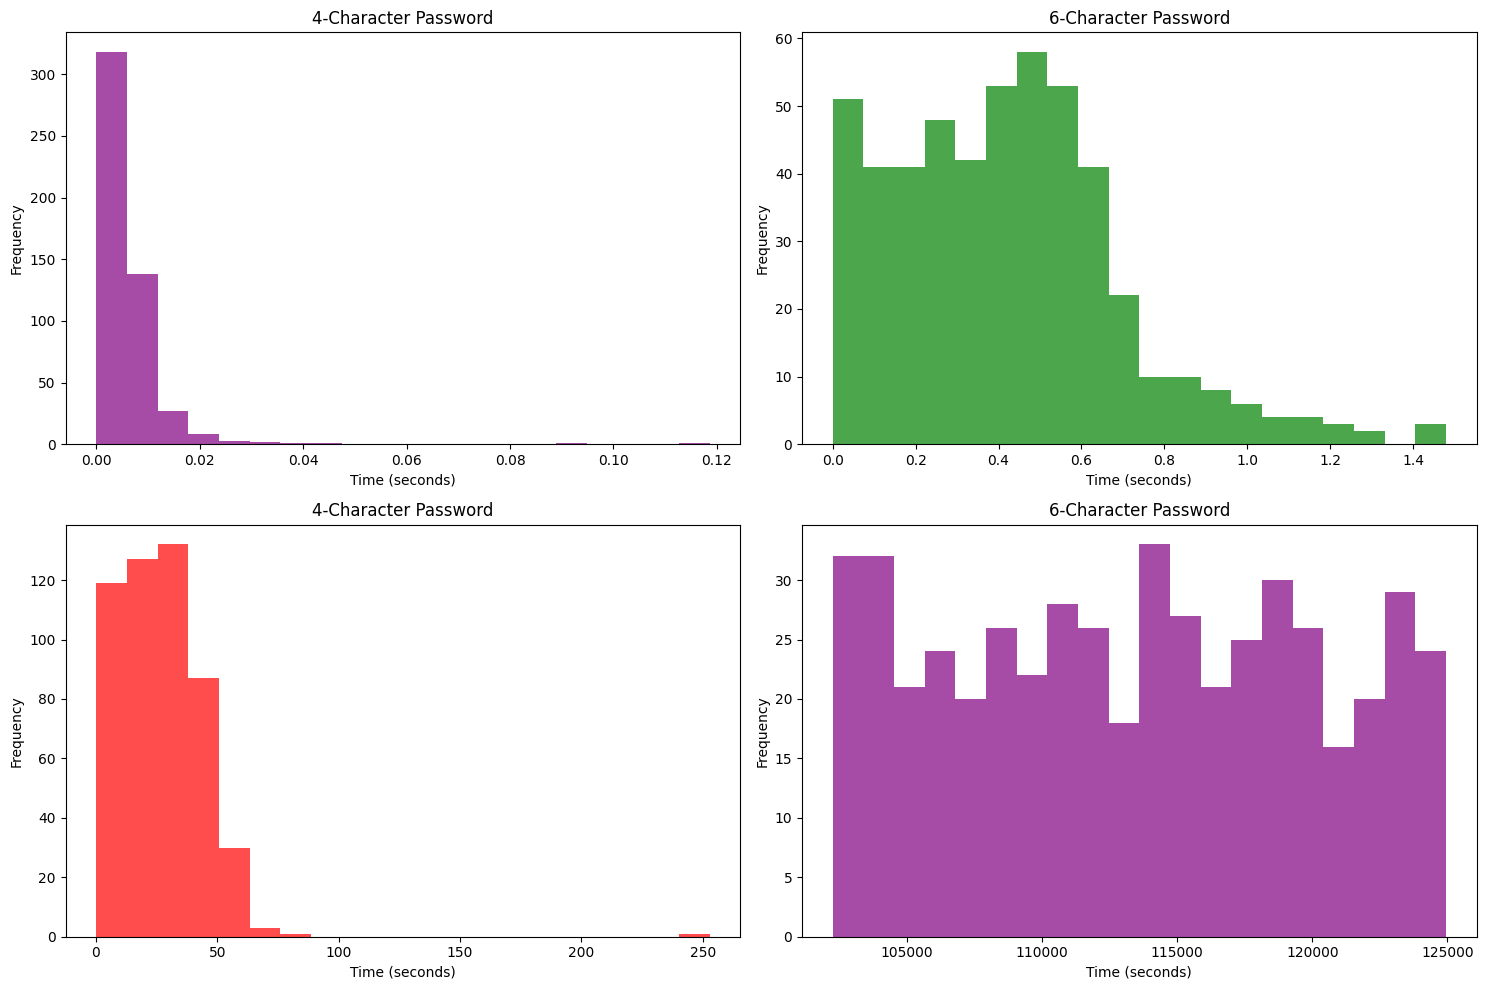

In [15]:


# Determine number of rows and columns for the subplots
n_plots = len(frames)
n_cols = 2  # You can adjust this value based on how many columns you want
n_rows = math.ceil(n_plots / n_cols)

# Create subplots with dynamic rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes to make indexing easier if the grid has multiple rows
axes = axes.flatten()

# Loop through frames and plot
for i, frame in enumerate(frames):
    axes[i].hist(frame['Time (seconds)'], bins=20, color=random.choice(['red', 'blue', 'green', 'purple']), alpha=0.7)
    axes[i].set_xlabel('Time (seconds)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{test_cases[i]["length"]}-Character Password')

# Turn off unused axes
for i in range(n_plots, len(axes)):
    axes[i].axis('off')

# Apply tight layout to avoid overlap and adjust spacing
plt.tight_layout()

# Show the plots
plt.show()


### **Conclusion**  

This project provided a comprehensive analysis of modular exponentiation, brute-force password cracking, and the complexity of breaking RSA encryption. Through systematic experimentation, we gained key insights into computational efficiency and security vulnerabilities.  

1. **Modular Exponentiation:**  
   - The **Exponentiation by Squaring** method significantly outperformed direct computation.  
   - Python’s built-in `pow()` function proved to be the most optimized approach.  
   - These results emphasize the importance of efficient algorithms in cryptographic operations.  

2. **RSA Brute-Force Analysis:**  
   - Finding the decryption key `d` via brute force quickly became impractical as key sizes increased.  
   - The execution time scaled exponentially, making brute-force decryption infeasible for real-world RSA implementations.  
   - This reinforces why RSA remains secure when sufficiently large primes are used.  

3. **Brute-Force Password Cracking:**  
   - Short numeric PINs were cracked in milliseconds, demonstrating their vulnerability.  
   - Alphanumeric passwords significantly increased brute-force time due to larger character sets.  
   - The findings highlight the need for strong password policies and alternative authentication measures.  

### **Key Takeaways:**  
- Efficient algorithms are crucial for cryptographic operations, as seen in modular exponentiation.  
- RSA encryption relies on computational infeasibility, making brute-force attacks unrealistic for large keys.  
- Weak passwords are highly vulnerable to brute-force attacks, emphasizing the need for complex and unique passwords.  

In conclusion, this project underscores the balance between security and computational efficiency in cryptography. By understanding these concepts, we can better design secure systems that resist brute-force attacks and ensure data protection.